In [1]:
#Importing the Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the Dataset:
data=pd.read_csv('C:/Users/mizoh/Desktop/Data Glacier/Article Assignment/top250-00-19.csv')

DATA EXPLORATION

In [3]:
data.head()

,Name,Position,Age,Team from,League from,Team to,League to,Season,Market value,Transfer fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
data.shape

(4700, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team from     4700 non-null   object 
 4   League from   4700 non-null   object 
 5   Team to       4700 non-null   object 
 6   League to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market value  3440 non-null   float64
 9   Transfer fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [6]:
data.isnull().sum()

Name               0
Position           0
Age                0
Team from          0
League from        0
Team to            0
League to          0
Season             0
Market value    1260
Transfer fee       0
dtype: int64

In [7]:
data.describe()

,Age,Market value,Transfer fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [8]:
# The minimum Market Value is 50 000 while the maximum Market Value is 120 000 000
# The minimum Transfer fee is 8 250 000 while the maximum Transfer fee is 220 000 000

In [9]:
data.corr()

,Age,Market value,Transfer fee
Age,1.000000,0.142739,-0.001803
Market value,0.142739,1.000000,0.830573
Transfer fee,-0.001803,0.830573,1.000000


In [10]:
# Transfer fee and Market Value are positively highly correlated where the correlation coefficient is 0.830573 near to 1.

DATA MANIPULATION

In [11]:
Defender=['Centre-Back','Right-Back','Left-Back','Defender']
Forward = ['Right Winger','Centre-Forward','Left Winger','Forward','Sweeper','Second Striker']
Midfielder = ['Central Midfield', 'Attacking Midfield', 'Defensive Midfield', 'Left Midfield','Right Midfield', 'Midfielder']
conditions = [
    data['Position'].isin(Defender),
    data['Position'].isin(Forward),
    data['Position'].isin(Midfielder),
    data['Position']=='Goalkeeper']
 
values = ['Defender', 'Forward','Midfielder','Goalkeeper']

data['Position'] = np.select(conditions, values)

In [12]:
data.head()

,Name,Position,Age,Team from,League from,Team to,League to,Season,Market value,Transfer fee
0,Luís Figo,Forward,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Forward,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [13]:
for col in data.columns:
    if ' ' in col:
        data=data.rename(columns={col:col.replace(' ','_')})

In [14]:
data.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [15]:
top5_leagues = ['Premier League', 'Serie A', 'LaLiga', 'Ligue 1', '1.Bundesliga']
data_top5_leagues = data.loc[ (data['League_to'].isin(top5_leagues))]

In [16]:
# The data_top5_leagues includes only players that went to the 5 top leagues('Premier League','La Liga','Serie A','Ligue 1',
# '1.Bundesliga')

EXPLORATORY DATA ANALYSIS 

In [17]:
#The Most Preffered Position in the top 5 leagues:

In [18]:
data_top5_leagues['Position'].value_counts()

Forward       1292
Midfielder    1030
Defender       868
Goalkeeper     149
Name: Position, dtype: int64

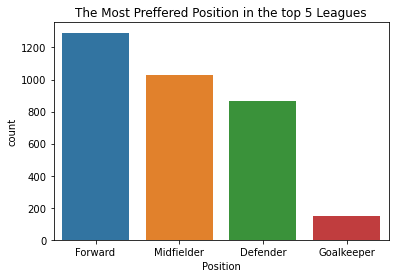

In [19]:
sns.countplot(x='Position',data=data_top5_leagues,order=data_top5_leagues['Position'].value_counts().index)
plt.title('The Most Preffered Position in the top 5 Leagues')
plt.show()

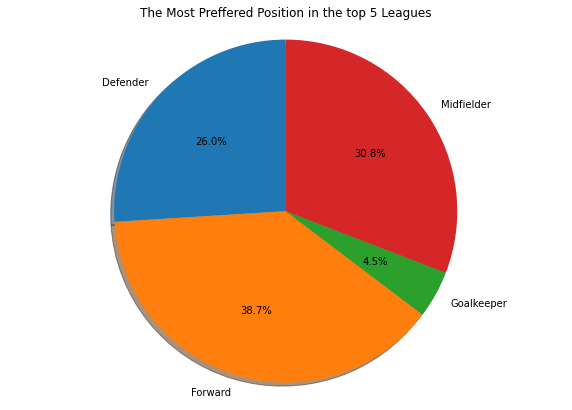

In [20]:
player_position=data_top5_leagues.groupby('Position').Position.count()
labs=player_position.index
vals=player_position.values
fig,axp=plt.subplots(figsize=(10,7))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True,startangle=90)
axp.axis('equal')
plt.title('The Most Preffered Position in the top 5 Leagues')
plt.show()

In [21]:
#The Most Requested or Preffered Position in the top 5 Leagues in Percentages.

In [134]:
#From the above two graphs(histogram and piechart) we can notice that the Forward position is the most requested compared to the
# other positions in the top 5 Leagues.

In [23]:
player_League_to=data_top5_leagues.groupby(['League_to','Position']).League_to.count()
player_League_to

League_to       Position  
1.Bundesliga    Defender      118
                Forward       166
                Goalkeeper      6
                Midfielder    132
LaLiga          Defender      133
                Forward       206
                Goalkeeper     29
                Midfielder    157
Ligue 1         Defender       85
                Forward       171
                Goalkeeper      9
                Midfielder    132
Premier League  Defender      333
                Forward       459
                Goalkeeper     67
                Midfielder    397
Serie A         Defender      199
                Forward       290
                Goalkeeper     38
                Midfielder    212
Name: League_to, dtype: int64

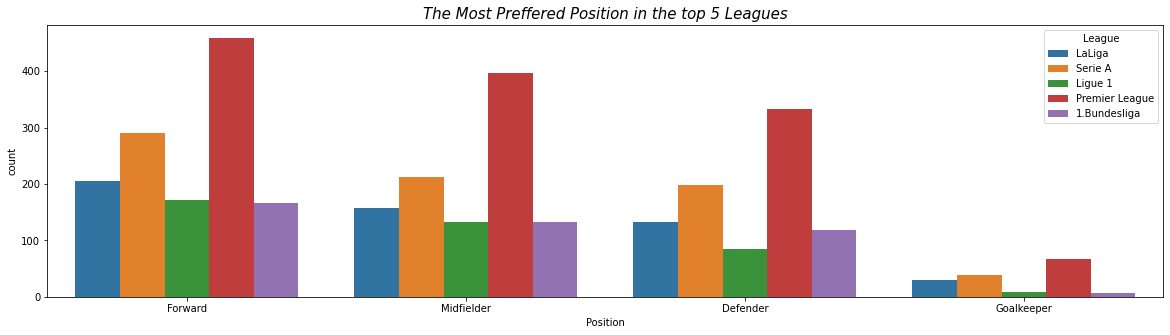

In [24]:
from matplotlib.pyplot import figure
figure(figsize=(20, 5))
sns.countplot(x='Position',data=data_top5_leagues,
              order=data_top5_leagues['Position'].value_counts().index,
              hue='League_to')
plt.title('The Most Preffered Position in the top 5 Leagues',fontsize=15,style='oblique')
plt.legend(title='League')
plt.show()

In [25]:
# From this graph we can notice that the Premier League is most prefferable league for all the players for different positions
# between the years 2000 and 2018.
# The league that follows the Premier league is the Seria A

HOW MANY TRANSFERS ARE MADE EACH SEASON ?

In [26]:
data_top5_leagues.groupby('Season').Season.count()

Season
2000-2001    176
2001-2002    194
2002-2003    157
2003-2004    142
2004-2005    162
2005-2006    168
2006-2007    187
2007-2008    203
2008-2009    190
2009-2010    175
2010-2011    151
2011-2012    171
2012-2013    167
2013-2014    159
2014-2015    167
2015-2016    187
2016-2017    182
2017-2018    209
2018-2019    192
Name: Season, dtype: int64

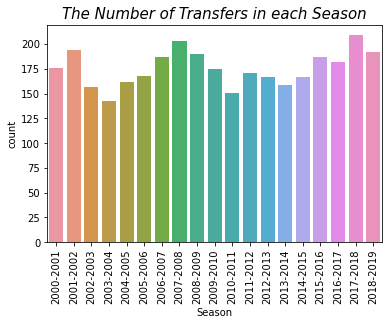

In [27]:
sns.countplot(x='Season', data=data_top5_leagues,order=data_top5_leagues.groupby('Season').Season.count().index)
plt.xticks(rotation=90)
plt.title('The Number of Transfers in each Season',style='italic',fontsize=15)
plt.show()

In [28]:
# We can notice that the Season 2017-2018 contains the highest number of Transfers 209.

In [29]:
data_top5_leagues.groupby(['League_to','Season']).League_to.count()

League_to     Season   
1.Bundesliga  2000-2001    17
              2001-2002    26
              2002-2003    31
              2003-2004    14
              2004-2005    17
                           ..
Serie A       2014-2015    31
              2015-2016    31
              2016-2017    35
              2017-2018    36
              2018-2019    58
Name: League_to, Length: 95, dtype: int64

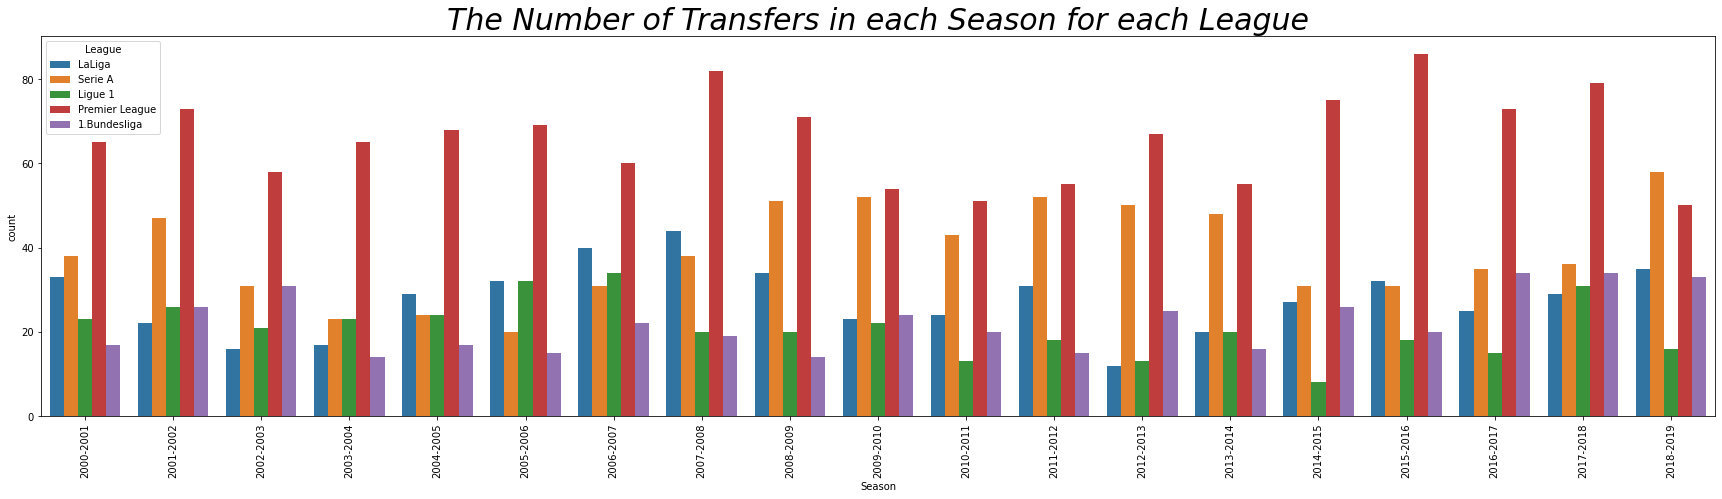

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(30, 7))
sns.countplot(x='Season', data=data_top5_leagues,
             hue='League_to')
plt.xticks(rotation=90)
plt.title('The Number of Transfers in each Season for each League',style='italic',fontsize=30)
plt.legend(title='League')
plt.show()

In [135]:
# we can notice that Premier League has the most number of transfers in each Season compared to other Leagues except
# in the season 2018-2019 in which Seria A surpass the other Leagues especially the Premier League

WHICH LEAGUE PAYS THE MOST MONEY IN THE TRANSFER MARKET?

In [32]:
League_buy=data_top5_leagues.groupby('League_to').Transfer_fee.sum().sort_values(ascending=False)
League_buy

League_to
Premier League    14695400000
Serie A            7535220000
LaLiga             6680360000
Ligue 1            3682720000
1.Bundesliga       3599645000
Name: Transfer_fee, dtype: int64

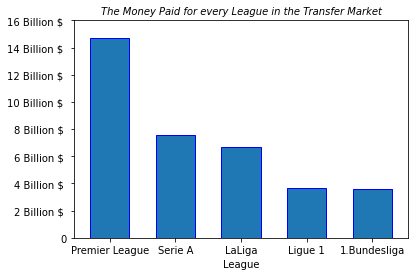

In [33]:
League_buy.plot(kind='bar',lw=1,edgecolor='blue',width=0.6)
plt.xticks(rotation=0)
plt.xlabel('League',fontsize=10)
yticks = list(np.arange(0,18000000000,2000000000))
plt.yticks(ticks=yticks, labels =[f"{round(int(y)/1000000000)} Billion $ " if y > 0 else "0" for y in yticks] )
plt.title('The Money Paid for every League in the Transfer Market',fontsize=10,style='oblique')
plt.show()

In [136]:
# From here we can notice that the Premier League is the league which pays the most money in the transfer market
# while the 1.Bundesliga is the lowestst league which pays money in the trasnfer market.

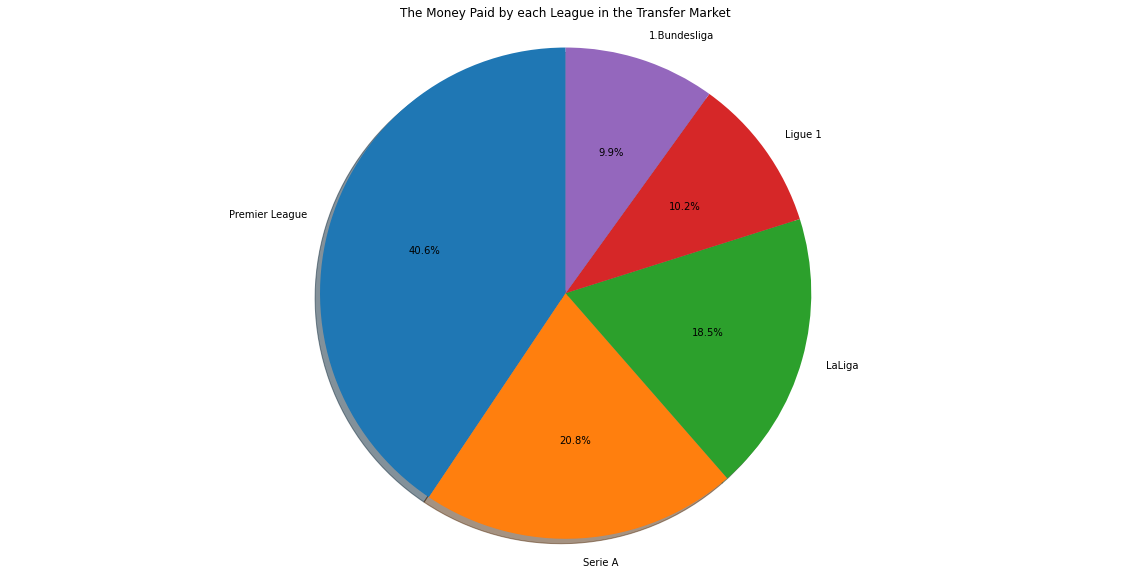

In [35]:
labs=League_buy.index
vals=League_buy.values
fig,axp=plt.subplots(figsize=(20,10))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=True,startangle=90)
axp.axis('equal')
plt.title('The Money Paid by each League in the Transfer Market')
plt.show()

In [36]:
#The Premier League is the League which paid the most money of percentage 40.6% while the 1.Bundesliga is the League which paid
# the least money of percentage 9.9%

WHICH LEAGUE GAINS THE MOST MONEY FROM SELLING PLAYERS ?

In [37]:
League_sell=data_top5_leagues.groupby('League_from').Transfer_fee.sum().sort_values(ascending=False)
League_sell

League_from
Serie A                  6571000000
Premier League           6502180000
LaLiga                   4930140000
Ligue 1                  4002760000
1.Bundesliga             2855810000
                            ...    
Primera Div. Apertura       2000000
J1 - 2nd Stage              2000000
Regionalliga Nord           1800000
 China                      1300000
Challenge League             825000
Name: Transfer_fee, Length: 86, dtype: int64

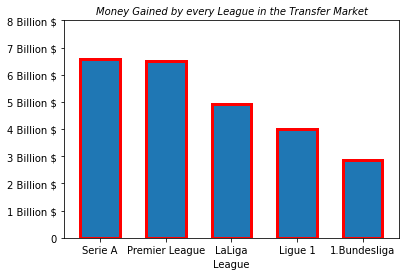

In [38]:
League_sell.head().plot(kind='bar',lw=3,edgecolor='red',width=0.6)
plt.xticks(rotation=0)
plt.xlabel('League')
yticks = list(np.arange(0,9000000000,1000000000))
plt.yticks(ticks=yticks,labels=[f"{round(int(y)/1000000000) } Billion $" if y > 0 else "0" for y in yticks])
plt.title('Money Gained by every League in the Transfer Market',fontsize=10,style='oblique')
plt.show()

In [39]:
# We can notice that Seria A is the most League that gains money by selling its players however Premier League can be considered
# also with the most leagues that gains money since is approximately qual to Seria A.
# However, 1.Bundesliga is the league that gains the least money by selling its players.

DO THE TOP 5 LEAGUES MAKE PROFIT OR LOSSES FROM BUYING AND SELLING PLAYERS ?

In [40]:
profit=League_sell.head() - League_buy
profit.sort_values(inplace=True)
profit=profit/1000000000
profit

Premier League   -8.193220
LaLiga           -1.750220
Serie A          -0.964220
1.Bundesliga     -0.743835
Ligue 1           0.320040
Name: Transfer_fee, dtype: float64

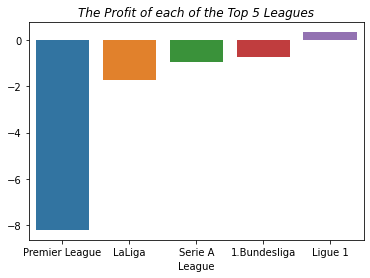

In [41]:
sns.barplot(x=profit.index,y=profit.values,data=profit)
plt.xticks(ticks=np.arange(0,5,1),labels=profit.index)
plt.xlabel('League')
plt.title('The Profit of each of the Top 5 Leagues',style='italic',fontsize=12)
plt.show()

In [42]:
# Approximately all the Leagues losses except Ligue 1 which gains approximately 320,040,000

LEAGUE OF THE MOST NUMBER OF TRANSFERS

In [43]:
nb_of_transfers=data_top5_leagues.groupby(['League_to']).League_to.count().sort_values(ascending=False)

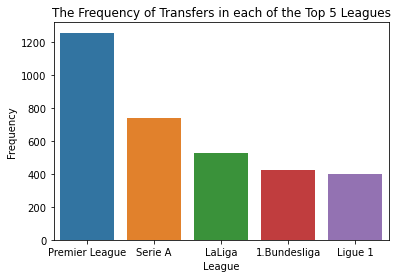

In [44]:
sns.barplot(x=nb_of_transfers.index,y=nb_of_transfers)
plt.xlabel('League')
plt.ylabel('Frequency')
plt.title('The Frequency of Transfers in each of the Top 5 Leagues')
plt.show()

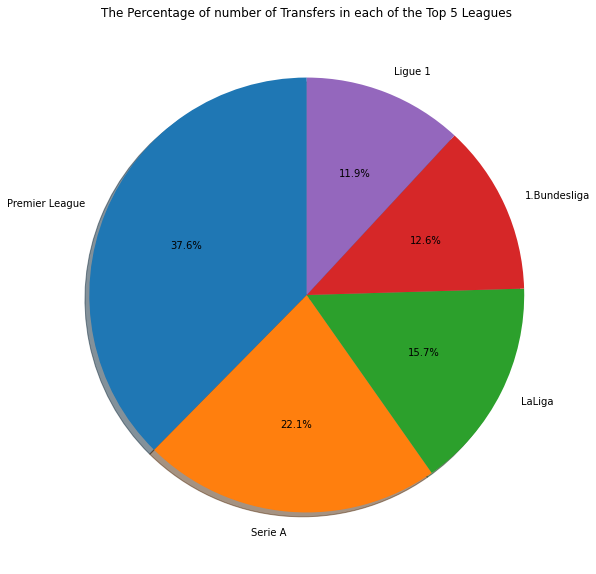

In [45]:
fig,axp=plt.subplots(figsize=(20,10))
axp.pie(nb_of_transfers.values,labels=nb_of_transfers.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('The Percentage of number of Transfers in each of the Top 5 Leagues')
plt.show()

In [46]:
# The Premier League has the highest percentage of transfers with 37.6 % while the 1.Bundesliga has the lowest percentage of 
# transfers with 11.9 %

TEAMS WITH THE LARGEST TRANSFER FEE

In [47]:
top_buyers=data_top5_leagues.groupby(['Team_to','League_to']).Transfer_fee.sum().sort_values(ascending=False)
top_buyers

Team_to         League_to     
Chelsea         Premier League    1820650000
Man City        Premier League    1779660000
Real Madrid     LaLiga            1680650000
FC Barcelona    LaLiga            1673040000
Man Utd         Premier League    1497360000
                                     ...    
Como            Serie A              2500000
Levante UD      LaLiga               2200000
Hansa Rostock   1.Bundesliga         2200000
Rayo Vallecano  LaLiga               2000000
Guingamp        Ligue 1              1800000
Name: Transfer_fee, Length: 147, dtype: int64

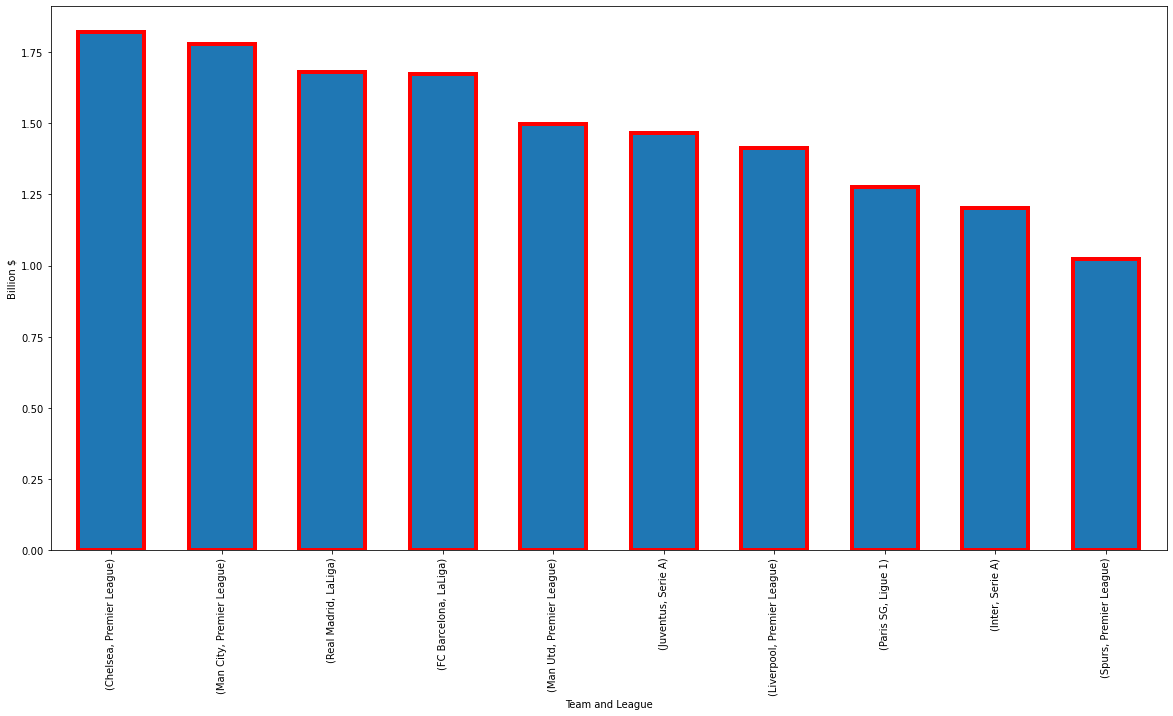

In [48]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
(top_buyers.head(10)/1000000000).plot(kind='bar',lw=4,edgecolor='red',width=0.6)
plt.xlabel('Team and League')
plt.ylabel('Billion $')
plt.show()

In [49]:
# From the top 10 teams that have the largest transfer fees we can notice that Chelsea is the team with the largest transfer
# fees compared to the other teams

WHICH TEAM GAINS THE MOST MONEY IN TRANSFER MARKET

In [50]:
top_sellers=data_top5_leagues.groupby(['Team_from','League_from']).Transfer_fee.sum().sort_values(ascending=False)
top_sellers.head(10)

Team_from     League_from   
Monaco        Ligue 1           930170000
Real Madrid   LaLiga            858400000
Liverpool     Premier League    773160000
FC Porto      Liga NOS          741350000
Inter         Serie A           704600000
FC Barcelona  LaLiga            686950000
Chelsea       Premier League    679030000
Juventus      Serie A           671180000
AS Roma       Serie A           662700000
Benfica       Liga NOS          650670000
Name: Transfer_fee, dtype: int64

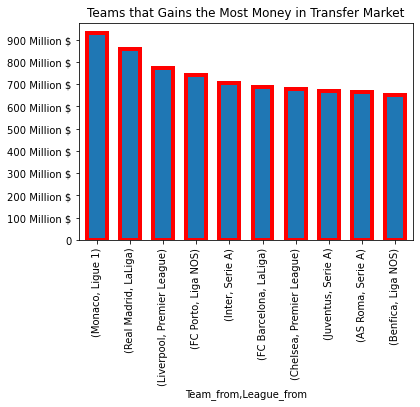

In [51]:
top_sellers.head(10).plot(kind='bar',lw=4,edgecolor='red',width=0.6)
yticks=list(np.arange(0,1000000000,100000000))
plt.xticks(rotation=90)
plt.yticks(ticks=yticks,labels=[f"{round(int(y)/1000000)} Million $" if y>0 else "0" for y in yticks])
plt.title('Teams that Gains the Most Money in Transfer Market')
plt.show()

In [52]:
# Monaco is the team that benefits the most from buying its players.

TEAMS WITH THE MOST TRANSFERS IN THE TOP 5 LEAGUES

In [53]:
data_top5_leagues.groupby('Team_to').Team_to.count().sort_values(ascending=False).head(10)

Team_to
Inter              97
Chelsea            96
Spurs              93
Man City           89
Juventus           86
Liverpool          85
AS Roma            77
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
Name: Team_to, dtype: int64

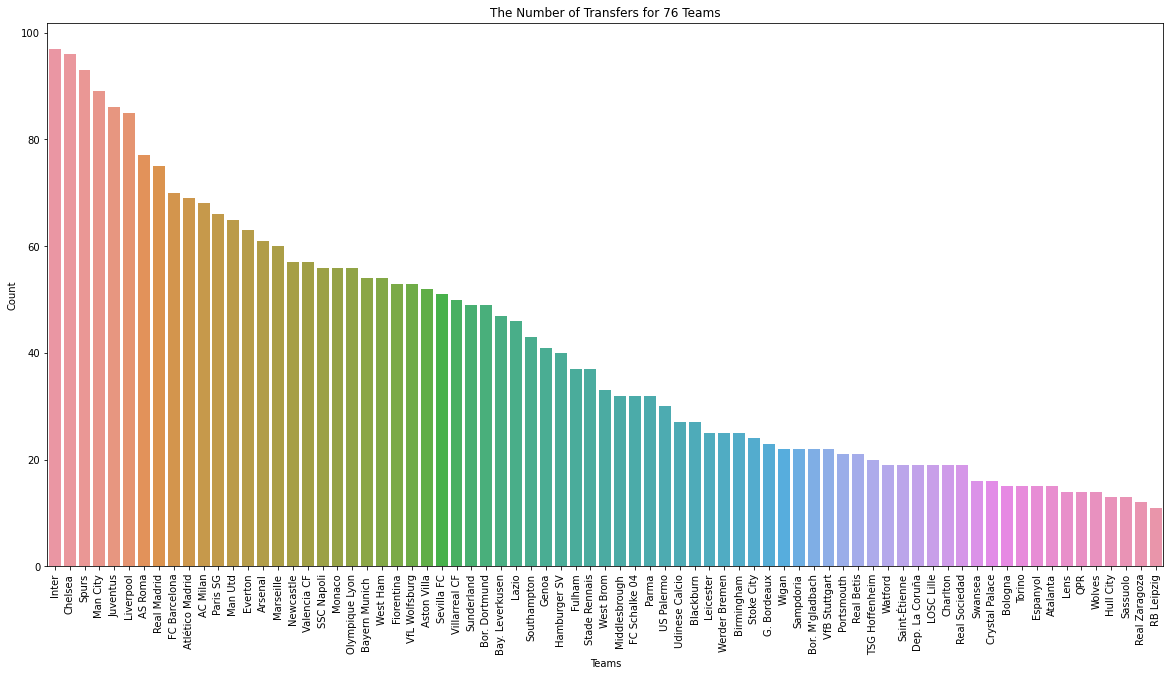

In [54]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
sns.countplot(x='Team_to',order=data_top5_leagues.groupby('Team_to').Team_to.count().sort_values(ascending=False)[0:75].index,
             data=data_top5_leagues)
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('The Number of Transfers for 76 Teams')
plt.show()

In [55]:
# Inter is the team of the top 5 leagues that contains the largest frequency of Transfers.

TEAMS WITH THE MOST TRANSFERS IN LEAGUES

In [56]:
premier_league=data_top5_leagues[data_top5_leagues['League_to']=='Premier League']
laliga=data_top5_leagues[data_top5_leagues['League_to']=='LaLiga']
ligue1=data_top5_leagues[data_top5_leagues['League_to']=='Ligue 1']
bundesliga=data_top5_leagues[data_top5_leagues['League_to']=='1.Bundesliga']
serieA=data_top5_leagues[data_top5_leagues['League_to']=='Serie A']

In [57]:
bundesliga.groupby('Team_to').Team_to.count().sort_values(ascending=False)

Team_to
Bayern Munich      54
VfL Wolfsburg      53
Bor. Dortmund      49
Bay. Leverkusen    47
Hamburger SV       40
FC Schalke 04      32
Werder Bremen      25
Bor. M'gladbach    22
VfB Stuttgart      22
TSG Hoffenheim     20
RB Leipzig         11
Hertha BSC         10
Hannover 96         8
1.FC K'lautern      6
1.FSV Mainz 05      6
1. FC Köln          5
1860 Munich         4
E. Frankfurt        3
SC Freiburg         3
FC Augsburg         1
Hansa Rostock       1
Name: Team_to, dtype: int64

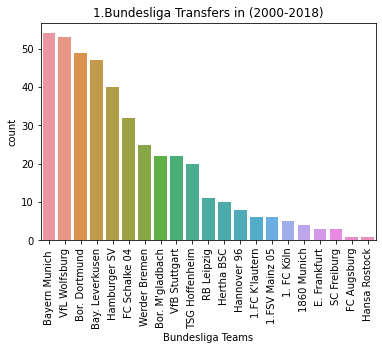

In [58]:
sns.countplot(x="Team_to",data=bundesliga,order=bundesliga.groupby('Team_to').Team_to.count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('Bundesliga Teams')
plt.title('1.Bundesliga Transfers in (2000-2018)')
plt.show()

In [59]:
# Bayern Munich is the team that contains the largest number of transfers with 54 transfer while Hansa Rostock is the team with the lowest number
# of transfers with 1 transfer only along with FC Augsburg in Bundesliga.

In [60]:
premier_league.groupby('Team_to').Team_to.count().sort_values(ascending=False)

Team_to
Chelsea           96
Spurs             93
Man City          89
Liverpool         85
Man Utd           65
Everton           63
Arsenal           61
Newcastle         57
West Ham          54
Aston Villa       52
Sunderland        49
Southampton       43
Fulham            37
West Brom         33
Middlesbrough     32
Blackburn         27
Leicester         25
Birmingham        25
Stoke City        24
Wigan             22
Portsmouth        21
Watford           19
Charlton          19
Crystal Palace    16
Swansea           16
QPR               14
Wolves            14
Hull City         13
Bournemouth       11
Bolton            11
Norwich            8
Leeds              8
Huddersfield       8
Brighton           7
Derby              7
Ipswich            7
Burnley            6
Cardiff            5
Sheffield Utd.     4
Pyramids FC        3
Coventry City      3
Reading            2
Bradford City      2
Name: Team_to, dtype: int64

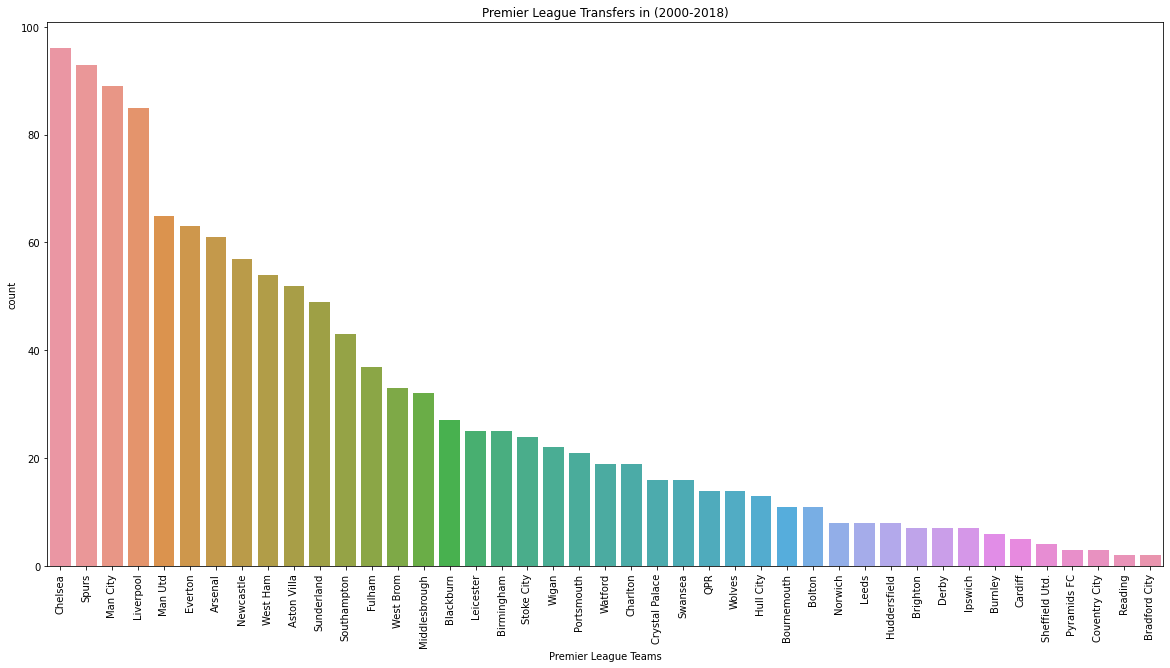

In [61]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
sns.countplot(x="Team_to",data=premier_league,order=premier_league.groupby('Team_to').Team_to.count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('Premier League Teams')
plt.title('Premier League Transfers in (2000-2018)')
plt.show()

In [137]:
# In addition to that Chelsea is the tam of the highest transfers between the leagues it is also the team of the highest tranfers 
# in the premier league with 96 transfer while Bradford City is the tem with the lowest transfers with 2 along with Reading

In [63]:
laliga.groupby('Team_to').Team_to.count().sort_values(ascending=False)

Team_to
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
Valencia CF        57
Sevilla FC         51
Villarreal CF      50
Real Betis         21
Dep. La Coruña     19
Real Sociedad      19
Espanyol           15
Real Zaragoza      12
Athletic Bilbao    10
RCD Mallorca       10
Málaga CF           9
Celta de Vigo       9
Getafe CF           8
Racing              3
Granada CF          3
Girona FC           2
UD Almería          2
UD Las Palmas       2
CA Osasuna          2
Alavés              2
Levante UD          1
Rayo Vallecano      1
Hércules CF         1
Real Murcia         1
Recr. Huelva        1
Name: Team_to, dtype: int64

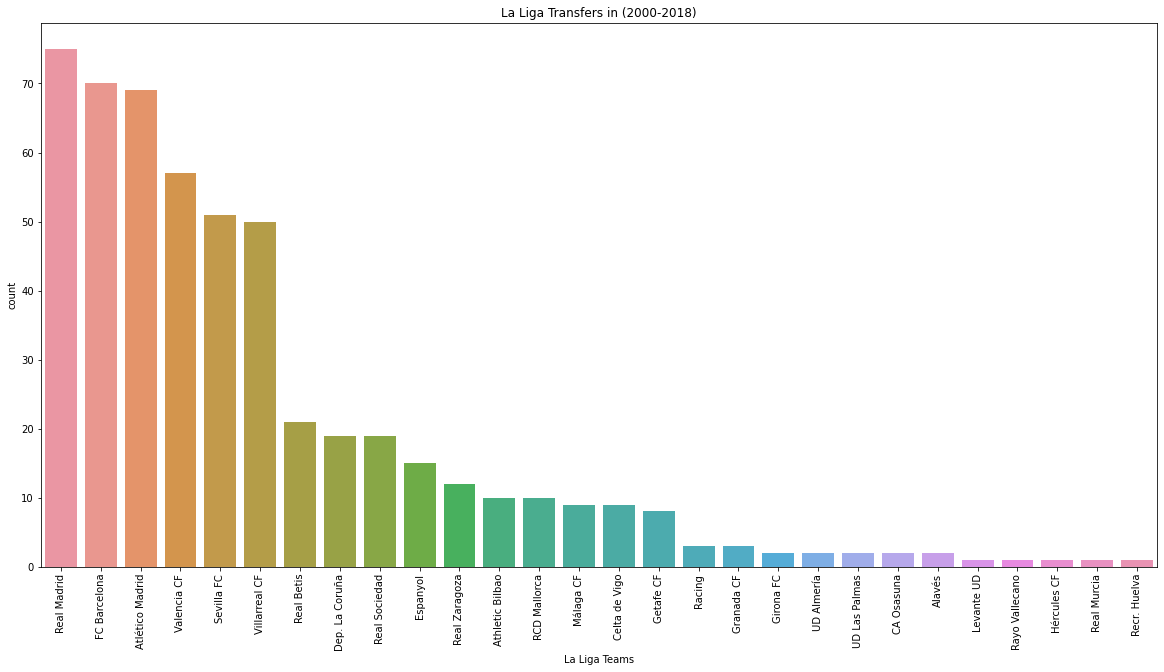

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
sns.countplot(x="Team_to",data=laliga,order=laliga.groupby('Team_to').Team_to.count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('La Liga Teams')
plt.title('La Liga Transfers in (2000-2018)')
plt.show()

In [65]:
# Real Madrid is the team that contains the largest number of transfers with 75 transfer while Levante ID is the team with the lowest number
# of transfers with 1 transfer only along with Rayo Vallecano,Hércules CF,Real Murcia,Recr. Huelva in La Liga.

In [66]:
ligue1.groupby('Team_to').Team_to.count().sort_values(ascending=False)

Team_to
Paris SG          66
Marseille         60
Monaco            56
Olympique Lyon    56
Stade Rennais     37
G. Bordeaux       23
Saint-Étienne     19
LOSC Lille        19
Lens              14
Toulouse          10
FC Nantes          9
OGC Nice           7
AJ Auxerre         7
FC Sochaux         4
FC Lorient         2
Montpellier        2
Le Mans            2
R. Strasbourg      2
Guingamp           1
SM Caen            1
Name: Team_to, dtype: int64

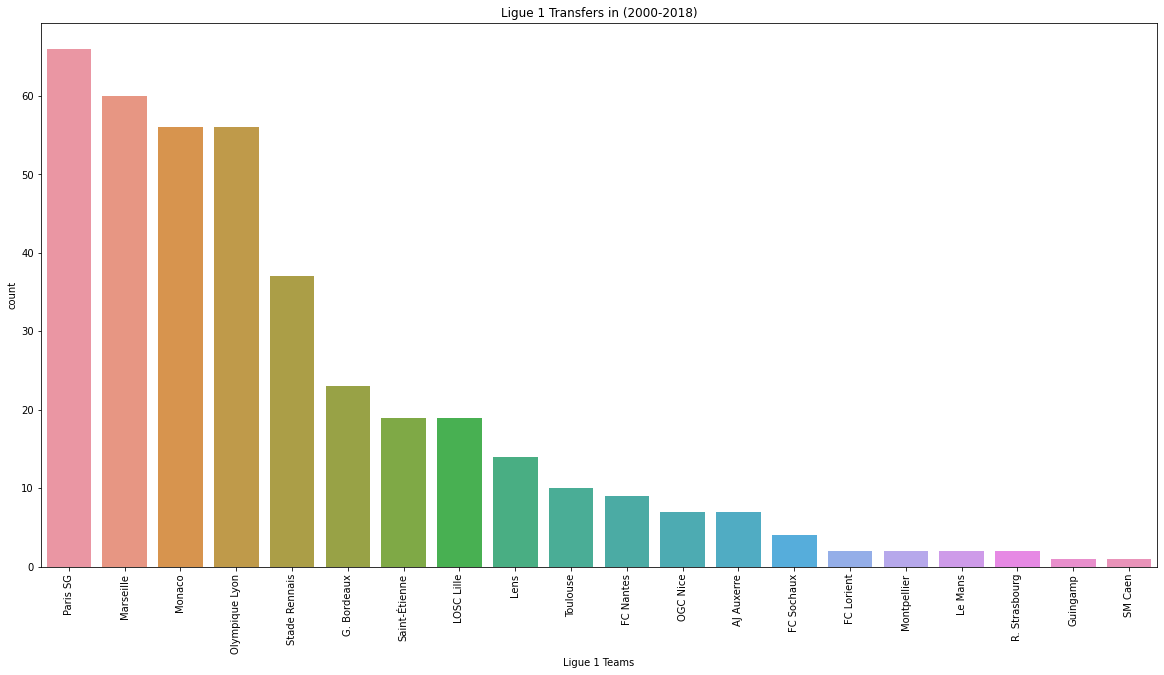

In [67]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
sns.countplot(x="Team_to",data=ligue1,order=ligue1.groupby('Team_to').Team_to.count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('Ligue 1 Teams')
plt.title('Ligue 1 Transfers in (2000-2018)')
plt.show()

In [68]:
# Paris SG is the team that contains the largest number of transfers with 66 transfer while Guingamp is the team with the lowest number
# of transfers with 1 transfer only along with SM Caen in Ligue 1.

In [69]:
serieA.groupby('Team_to').Team_to.count().sort_values(ascending=False)

Team_to
Inter              97
Juventus           86
AS Roma            77
AC Milan           68
SSC Napoli         56
Fiorentina         53
Lazio              46
Genoa              41
Parma              32
US Palermo         30
Udinese Calcio     27
Sampdoria          22
Bologna            15
Torino             15
Atalanta           15
Sassuolo           13
Cagliari Calcio     9
Siena               5
Hellas Verona       4
Brescia             3
Bari                3
Chievo Verona       3
Reggina             3
Lecce               2
Catania             2
Pescara             2
RC Cesena           2
Venezia             1
Perugia             1
SPAL                1
Modena              1
AS Livorno          1
FC Empoli           1
Como                1
Vicenza             1
Name: Team_to, dtype: int64

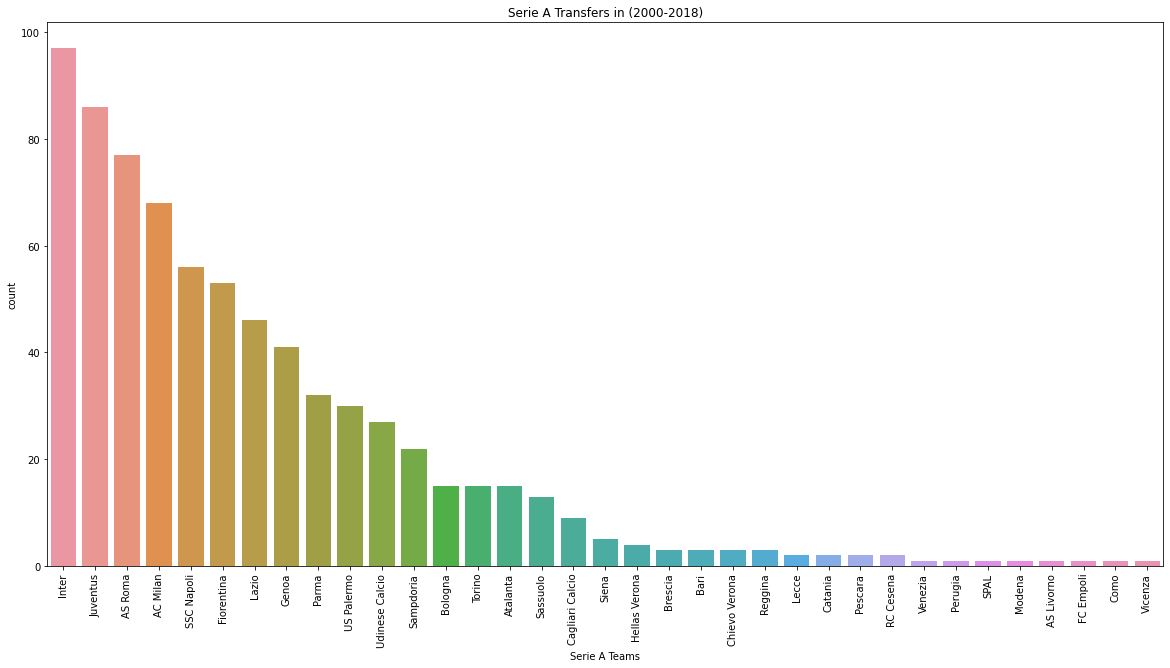

In [70]:
from matplotlib.pyplot import figure
figure(figsize=(20,10))
sns.countplot(x="Team_to",data=serieA,order=serieA.groupby('Team_to').Team_to.count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.xlabel('Serie A Teams')
plt.title('Serie A Transfers in (2000-2018)')
plt.show()

In [71]:
# Inter is the team that contains the largest number of transfers with 97 transfer while Venezia is the team with the lowest number
# of transfers with 1 transfer only along with Perugia, SPAL, Modena, AS Livorno, FC Empoli, Como, Vicenza in Serie A.

PLAYERS STATISTICS

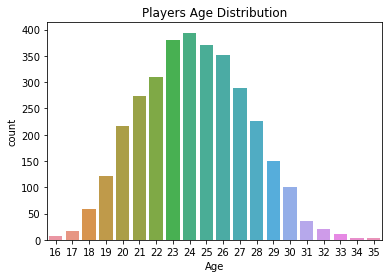

In [76]:
# Players Age distribution:
sns.countplot(x='Age',data=data_top5_leagues)
plt.title('Players Age Distribution')
plt.show()

In [77]:
# This shows that the average age of a footballplayer is 24 years old since age 24 has the highest frequency

In [79]:
# Age vs Transfer fees
data_top5_leagues.groupby('Age').Transfer_fee.agg(['count','min','max'])

,count,min,max
Age,,,
16,7,3000000,21000000
17,17,2000000,24000000
18,58,2700000,45000000
19,122,1500000,135000000
20,217,950000,115000000
21,274,825000,88200000
22,310,1300000,70000000
23,381,1000000,105000000
24,394,900000,101000000


In [81]:
# Age vs League Statistics
data_top5_leagues.groupby('League_to').Age.agg(['mean','min','max'])

,mean,min,max
League_to,,,
1.Bundesliga,23.725118,17,35
LaLiga,24.396190,17,34
Ligue 1,23.889169,16,35
Premier League,24.516720,16,35
Serie A,24.347767,16,35


In [82]:
# This gives that the average of Age in each league is approximately 24 whereas 1.Bundesliga has the youngest average age of players

In [83]:
# Age vs Position Statistics
data_top5_leagues.groupby('Position').Age.agg(['mean','min','max'])

,mean,min,max
Position,,,
Defender,24.322581,16,34
Forward,24.079721,16,33
Goalkeeper,26.000000,19,35
Midfielder,24.265049,16,35


In [138]:
#GoalKeeper Position has the highest average age compared to other positions.

In [84]:
# Position vs Transfer fee
data_top5_leagues.groupby('Position').Transfer_fee.agg(['mean','min','max'])

,mean,min,max
Position,,,
Defender,9.288738e+06,825000,78800000
Forward,1.221750e+07,900000,222000000
Goalkeeper,8.357248e+06,1320000,62500000
Midfielder,1.077717e+07,950000,125000000


In [85]:
# Forward position have the highest average of transfer fee whereas the GoalKeeper position have the lowest average of transfer fee

In [92]:
# Top 5 leagues-Youngest player:
data_top5_leagues.loc[data_top5_leagues['Age'].idxmin()]

Name              Cesc Fàbregas
Position             Midfielder
Age                          16
Team_from       Barça Juvenil A
League_from               Spain
Team_to                 Arsenal
League_to        Premier League
Season                2003-2004
Market_value                NaN
Transfer_fee            3200000
Name: 841, dtype: object

In [94]:
#Top 5 leagues-Oldest palyer:
data_top5_leagues.loc[data_top5_leagues['Age'].idxmax()]

Name            José Luis Chilavert
Position                 Goalkeeper
Age                              35
Team_from           Vélez Sarsfield
League_from               Argentina
Team_to               R. Strasbourg
League_to                   Ligue 1
Season                    2000-2001
Market_value                    NaN
Transfer_fee                5300000
Name: 112, dtype: object

In [98]:
#Top 5 leagues- Highest Transfer fee player
data_top5_leagues.loc[data_top5_leagues['Transfer_fee'].idxmax()]

Name                  Neymar
Position             Forward
Age                       25
Team_from       FC Barcelona
League_from           LaLiga
Team_to             Paris SG
League_to            Ligue 1
Season             2017-2018
Market_value     100000000.0
Transfer_fee       222000000
Name: 4211, dtype: object

In [99]:
#Top 5 leagues- Lowest Transfer fee player
data_top5_leagues.loc[data_top5_leagues['Transfer_fee'].idxmin()]

Name                  Rémo Meyer
Position                Defender
Age                           21
Team_from         Lausanne-Sport
League_from     Challenge League
Team_to              1860 Munich
League_to           1.Bundesliga
Season                 2002-2003
Market_value                 NaN
Transfer_fee              825000
Name: 741, dtype: object

In [97]:
#Top 5 leagues- Highest Market Value player
data_top5_leagues.loc[data_top5_leagues['Market_value'].idxmax()]

Name            Kylian Mbappé
Position              Forward
Age                        19
Team_from              Monaco
League_from           Ligue 1
Team_to              Paris SG
League_to             Ligue 1
Season              2018-2019
Market_value      120000000.0
Transfer_fee        135000000
Name: 4455, dtype: object

In [100]:
#Top 5 leagues- Lowest Market Value player
data_top5_leagues.loc[data_top5_leagues['Market_value'].idxmin()]

Name            Richard Chaplow
Position             Midfielder
Age                          20
Team_from               Burnley
League_from        Championship
Team_to               West Brom
League_to        Premier League
Season                2004-2005
Market_value            50000.0
Transfer_fee            2250000
Name: 1167, dtype: object

In [114]:
#Top 10 players with highest Transfer fees
data_top5_leagues.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
1,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
2,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
3,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4,Ousmane Dembélé,Forward,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115000000
5,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
6,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
7,Cristiano Ronaldo,Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.0,94000000
8,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
9,Neymar,Forward,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.0,88200000


In [115]:
# Top 10 players with highest Market Values
data_top5_leagues.sort_values('Market_value',ascending=False)[0:10].reset_index(drop=True)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
1,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
2,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
3,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
4,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
5,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
6,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
7,Naby Keïta,Midfielder,23,RB Leipzig,1.Bundesliga,Liverpool,Premier League,2018-2019,65000000.0,60000000
8,Pierre-Emerick Aubameyang,Forward,28,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2017-2018,65000000.0,63750000
9,Thomas Lemar,Forward,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000


In [117]:
#LaLiga - Top 10 Players(Transfer fees)
spain=laliga.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)
spain

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Philippe Coutinho,Midfielder,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90000000.0,125000000
1,Ousmane Dembélé,Forward,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33000000.0,115000000
2,Gareth Bale,Forward,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65000000.0,101000000
3,Cristiano Ronaldo,Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60000000.0,94000000
4,Neymar,Forward,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50000000.0,88200000
5,Luis Suárez,Forward,27,Liverpool,Premier League,FC Barcelona,LaLiga,2014-2015,52000000.0,81720000
6,Zinédine Zidane,Midfielder,29,Juventus,Serie A,Real Madrid,LaLiga,2001-2002,NaN,77500000
7,James Rodríguez,Midfielder,23,Monaco,Ligue 1,Real Madrid,LaLiga,2014-2015,60000000.0,75000000
8,Thomas Lemar,Forward,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000
9,Zlatan Ibrahimovic,Forward,27,Inter,Serie A,FC Barcelona,LaLiga,2009-2010,45000000.0,69500000


In [121]:
spain['Team_to'].value_counts()

FC Barcelona       5
Real Madrid        4
Atlético Madrid    1
Name: Team_to, dtype: int64

In [124]:
#Premier league-Top 10 Players(Transfer fees)
england=premier_league.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)
england

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Paul Pogba,Midfielder,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70000000.0,105000000
1,Romelu Lukaku,Forward,24,Everton,Premier League,Man Utd,Premier League,2017-2018,50000000.0,84700000
2,Virgil van Dijk,Defender,26,Southampton,Premier League,Liverpool,Premier League,2017-2018,30000000.0,78800000
3,Kevin De Bruyne,Midfielder,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2015-2016,45000000.0,76000000
4,Ángel Di María,Forward,26,Real Madrid,LaLiga,Man Utd,Premier League,2014-2015,50000000.0,75000000
5,Riyad Mahrez,Forward,27,Leicester,Premier League,Man City,Premier League,2018-2019,50000000.0,67800000
6,Álvaro Morata,Forward,24,Real Madrid,LaLiga,Chelsea,Premier League,2017-2018,40000000.0,66000000
7,Aymeric Laporte,Defender,23,Athletic Bilbao,LaLiga,Man City,Premier League,2017-2018,25000000.0,65000000
8,Pierre-Emerick Aubameyang,Forward,28,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2017-2018,65000000.0,63750000
9,Raheem Sterling,Forward,20,Liverpool,Premier League,Man City,Premier League,2015-2016,40000000.0,63700000


In [126]:
england['Team_to'].value_counts()

Man City     4
Man Utd      3
Liverpool    1
Chelsea      1
Arsenal      1
Name: Team_to, dtype: int64

In [127]:
#Serie A-Top 10 Players(Transfer fees)
italy=serieA.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)
italy

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Cristiano Ronaldo,Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
1,Gonzalo Higuaín,Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65000000.0,90000000
2,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
3,Gianluigi Buffon,Goalkeeper,23,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,52880000
4,Gaizka Mendieta,Midfielder,27,Valencia CF,LaLiga,Lazio,Serie A,2001-2002,NaN,48000000
5,Rui Costa,Midfielder,29,Fiorentina,Serie A,AC Milan,Serie A,2001-2002,NaN,42000000
6,Leonardo Bonucci,Defender,30,Juventus,Serie A,AC Milan,Serie A,2017-2018,45000000.0,42000000
7,Lilian Thuram,Defender,29,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,41500000
8,João Cancelo,Defender,24,Valencia CF,LaLiga,Juventus,Serie A,2018-2019,35000000.0,40400000
9,Douglas Costa,Forward,27,Bayern Munich,1.Bundesliga,Juventus,Serie A,2018-2019,55000000.0,40000000


In [128]:
italy['Team_to'].value_counts()

Juventus    6
Lazio       2
AC Milan    2
Name: Team_to, dtype: int64

In [129]:
#Ligue 1-Top 10 Players(Transfer fees)
france=ligue1.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)
france

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Neymar,Forward,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000
1,Kylian Mbappé,Forward,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
2,Edinson Cavani,Forward,26,SSC Napoli,Serie A,Paris SG,Ligue 1,2013-2014,55000000.0,64500000
3,Ángel Di María,Forward,27,Man Utd,Premier League,Paris SG,Ligue 1,2015-2016,50000000.0,63000000
4,David Luiz,Defender,27,Chelsea,Premier League,Paris SG,Ligue 1,2014-2015,26000000.0,49500000
5,James Rodríguez,Midfielder,21,FC Porto,Liga NOS,Monaco,Ligue 1,2013-2014,23000000.0,45000000
6,Falcao,Forward,27,Atlético Madrid,LaLiga,Monaco,Ligue 1,2013-2014,60000000.0,43000000
7,Thiago Silva,Defender,27,AC Milan,Serie A,Paris SG,Ligue 1,2012-2013,38000000.0,42000000
8,Javier Pastore,Midfielder,22,US Palermo,Serie A,Paris SG,Ligue 1,2011-2012,21000000.0,42000000
9,Lucas Moura,Forward,20,São Paulo,Série A,Paris SG,Ligue 1,2012-2013,35000000.0,40000000


In [130]:
france['Team_to'].value_counts()

Paris SG    8
Monaco      2
Name: Team_to, dtype: int64

In [131]:
#1Bundesliga-Top 10 Players(Transfer fees)
germany=bundesliga.sort_values('Transfer_fee',ascending=False)[0:10].reset_index(drop=True)
germany

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Julian Draxler,Midfielder,21,FC Schalke 04,1.Bundesliga,VfL Wolfsburg,1.Bundesliga,2015-2016,22000000.0,43000000
1,Corentin Tolisso,Midfielder,22,Olympique Lyon,Ligue 1,Bayern Munich,1.Bundesliga,2017-2018,22000000.0,41500000
2,Javi Martínez,Midfielder,24,Athletic Bilbao,LaLiga,Bayern Munich,1.Bundesliga,2012-2013,30000000.0,40000000
3,Arturo Vidal,Midfielder,28,Juventus,Serie A,Bayern Munich,1.Bundesliga,2015-2016,42000000.0,37500000
4,Mario Götze,Midfielder,21,Bor. Dortmund,1.Bundesliga,Bayern Munich,1.Bundesliga,2013-2014,45000000.0,37000000
5,Renato Sanches,Midfielder,18,Benfica,Liga NOS,Bayern Munich,1.Bundesliga,2016-2017,10000000.0,35000000
6,Mats Hummels,Defender,27,Bor. Dortmund,1.Bundesliga,Bayern Munich,1.Bundesliga,2016-2017,32000000.0,35000000
7,André Schürrle,Forward,24,Chelsea,Premier League,VfL Wolfsburg,1.Bundesliga,2014-2015,23000000.0,32000000
8,Mario Gómez,Forward,23,VfB Stuttgart,1.Bundesliga,Bayern Munich,1.Bundesliga,2009-2010,30000000.0,30000000
9,Franck Ribéry,Forward,24,Marseille,Ligue 1,Bayern Munich,1.Bundesliga,2007-2008,23000000.0,30000000


In [133]:
germany['Team_to'].value_counts()

Bayern Munich     8
VfL Wolfsburg     2
Name: Team_to, dtype: int64